In [ ]:
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL
from tensorflow.keras import models
from tensorflow.keras.layers import * 
from tensorflow.keras.optimizers import * 
from tensorflow.keras.losses import * 
from tensorflow.keras.utils import to_categorical


In [ ]:
train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
test.head()

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.info(), train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


(None, None)

In [ ]:
train.shape, test.shape

((19999, 785), (9999, 785))

In [ ]:
label = train.iloc[0]
image = train.iloc[0].drop('6', axis=0)
img = PIL.Image.fromarray(np.array(image).reshape(28,28).astype(np.uint8))
img

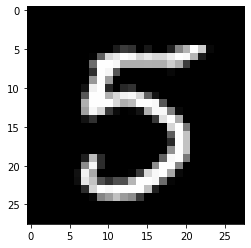

In [ ]:
plt.imshow(np.array(image).reshape(28,28).astype(np.uint8), cmap='gray');

In [ ]:
labels = train.iloc[:10,0]
labels

0    5
1    7
2    9
3    5
4    2
5    0
6    6
7    5
8    5
9    2
Name: 6, dtype: int64

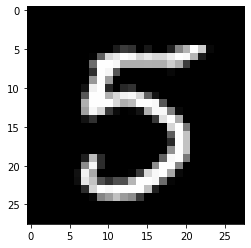

In [ ]:
img = np.array(train.iloc[:10, 1:]).reshape(10, 28, 28)
plt.imshow(img[0], cmap='gray');

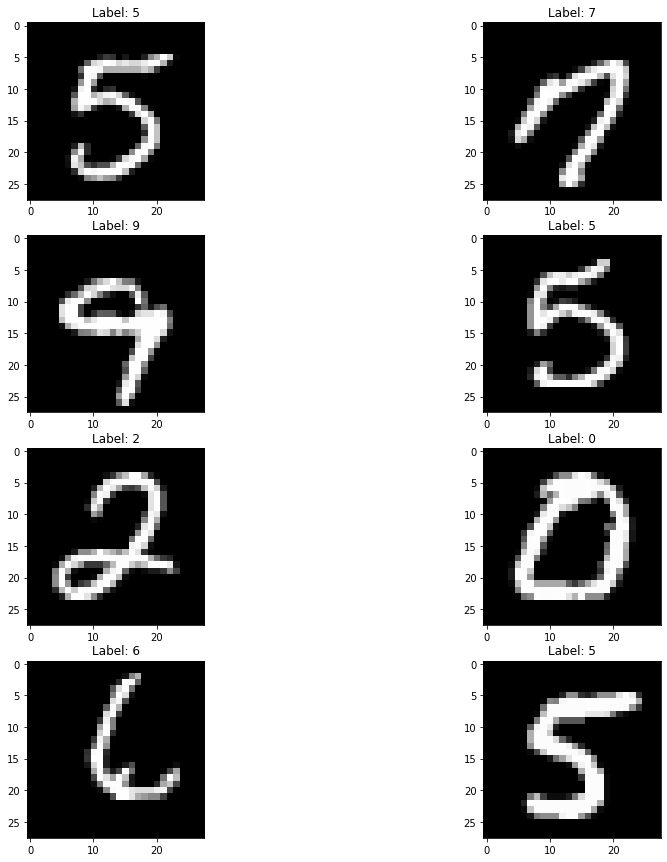

In [ ]:
labels = train.iloc[:10,0]
img = np.array(train.iloc[:10, 1:]).reshape(10, 28,28)
fig, axes = plt.subplots(4, 2, figsize=(15,15))
axes = axes.flatten()
for i in range(8):
  axes[i].imshow(img[i], cmap='gray');
  axes[i].set_title(f"Label: {labels[i]}")

In [ ]:
# validation split
from sklearn.model_selection import train_test_split
trainY = to_categorical(train['6'])
X = train.drop('6', axis=1)/255
testX = test.drop('5', axis=1)/255
testY = to_categorical(test['7'])
trainX, valX, trainY, valY = train_test_split(X, trainY, test_size=0.2, shuffle=True, random_state=23)

In [ ]:
trainY.shape, valY.shape

((15999, 10), (4000, 10))

In [ ]:
testX.shape, testY.shape

((9999, 784), (9999, 10))

In [ ]:
np.mean(trainX.iloc[0]) # asserting it is normalized

0.14181672669067627

In [ ]:
# model building
from tensorflow.keras.callbacks import  ModelCheckpoint

model = models.Sequential()
model.add(Reshape(target_shape=(28,28,1), input_shape=(784, )))
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', kernel_initializer='normal'))
model.add(Conv1D(64, kernel_size=3, activation='relu', kernel_initializer='normal'))
model.add(Flatten())
# model.add(Dense(50, activation='relu', kernel_initializer='normal'))
model.add(Dense(10,  activation='softmax'))

# loss = CategoricalCrossentropy()
# optimizer = Adam()

cp = ModelCheckpoint("models/mnist_cls" ,save_best_only=True)
epoch = 5
batch_size = 100
model.compile(
    loss = 'categorical_crossentropy', 
    optimizer = 'adam',
    metrics = ['accuracy']
)



In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv1d_2 (Conv1D)           (None, 26, 24, 64)        6208      
                                                                 
 flatten_2 (Flatten)         (None, 39936)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                399370    
                                                                 
Total params: 405,898
Trainable params: 405,898
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(trainX, trainY, [validation_data=(valX, valY), epochs=epoch, batch_size=batch_size,callbacks=[cp], shuffle=True)

Epoch 1/5
160/160 [==============================] - 22s 132ms/step - loss: 0.4562 - accuracy: 0.8729 - val_loss: 0.1896 - val_accuracy: 0.9438
Epoch 2/5
160/160 [==============================] - 22s 137ms/step - loss: 0.1339 - accuracy: 0.9616 - val_loss: 0.0991 - val_accuracy: 0.9710
Epoch 3/5
160/160 [==============================] - 21s 129ms/step - loss: 0.0764 - accuracy: 0.9775 - val_loss: 0.0858 - val_accuracy: 0.9740
Epoch 4/5
160/160 [==============================] - 24s 148ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0790 - val_accuracy: 0.9758
Epoch 5/5
160/160 [==============================] - 20s 125ms/step - loss: 0.0334 - accuracy: 0.9902 - val_loss: 0.0965 - val_accuracy: 0.9705


In [ ]:
preds = model.predict(testX)

In [ ]:
preds

array([[9.5994896e-12, 6.0239313e-06, 9.9999344e-01, ..., 4.2091554e-20,
        2.2307173e-08, 1.2485293e-16],
       [1.5712830e-06, 9.2559242e-01, 5.3686272e-02, ..., 1.5130191e-02,
        1.1593050e-03, 1.7147620e-05],
       [9.9980754e-01, 5.7619850e-11, 1.5932052e-04, ..., 1.6357994e-09,
        1.3879090e-09, 2.1788682e-10],
       ...,
       [1.4305178e-08, 1.9332869e-09, 2.2838331e-09, ..., 1.0896646e-05,
        1.8459434e-05, 7.5476046e-06],
       [4.5789279e-09, 1.2640455e-09, 1.5266206e-10, ..., 2.8556095e-09,
        1.1582650e-04, 8.4393399e-08],
       [2.4317255e-09, 3.3922170e-15, 5.1917518e-06, ..., 1.1994612e-14,
        7.0284789e-12, 7.6313343e-16]], dtype=float32)

In [ ]:
preds.shape, testX.shape, testY.shape

((9999, 10), (9999, 784), (9999, 10))

In [ ]:
def labeler(preds):
  preds[preds>=0.5] = 1
  preds[preds<0.5] = 0

In [ ]:
labeler(preds)

In [ ]:
from tensorflow.keras.models import load_model
saved_model = load_model("/content/models/mnist_cls")
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_2 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv1d_2 (Conv1D)           (None, 26, 24, 64)        6208      
                                                                 
 flatten_2 (Flatten)         (None, 39936)             0         
                                                                 
 dense_4 (Dense)             (None, 10)                399370    
                                                                 
Total params: 405,898
Trainable params: 405,898
Non-trainable params: 0
_________________________________________________________________


In [ ]:
preds  = saved_model.predict(testX)
labeler(preds)

In [ ]:
accuracy_score(testY, preds)

0.9648964896489649

# Pytorch model 

In [ ]:
import torch 
from torch import nn 


In [ ]:
class mnist_classifier(nn.Module):
  def __init__(self, input):
    super(mnist_classifier, self).__init__()
    self.


  def forward(self):
    pass


In [ ]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)


    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
net = Net()

net

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
trainX = trainX.reshape(15999, 1, 28, 28)
testX = testX.reshape(9999, 1, 28, 28)
valX = valX.reshape(4000, 1, 28, 28)

In [ ]:
valX.shape

(4000, 1, 28, 28)

In [ ]:
import pandas as pd 
import numpy as np

In [ ]:
train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
from sklearn.model_selection import train_test_split
trainY = train['6']
trainX = train.drop('6', axis=1)/255
testX = test.drop('7', axis=1)/255
testY = test['7']
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, shuffle=True, random_state=23)

In [ ]:
trainX = trainX.values.reshape(15999, 1, 28, 28)
testX = testX.values.reshape(9999, 1, 28, 28)
valX = valX.values.reshape(4000, 1, 28, 28)

In [ ]:
# defined model;
from torch import nn 
from torch import optim
import torch
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5)
        self.conv2 = nn.Conv2d(32, 32, kernel_size=5)
        self.conv3 = nn.Conv2d(32,64, kernel_size=5)
        self.fc1 = nn.Linear(3*3*64, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x),2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(-1,3*3*64 )
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)
    
net = Net()

# loss and optimization functions;
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# dataset preparation special for pytorch;
torch_x_train = torch.from_numpy(trainX).type(torch.FloatTensor)
torch_y_train = torch.from_numpy(trainY.values).type(torch.LongTensor) # numpy array to Float and Long Tensor conversion respectively (value, label);

train = torch.utils.data.TensorDataset(torch_x_train,torch_y_train) # making dataset using TensorDataset;

train_loader = torch.utils.data.DataLoader(train, batch_size = 32, shuffle = False) # Creating DataLoader object so that it makes data easire way to grab and train;

torch_x_val = torch.from_numpy(valX).type(torch.FloatTensor)
torch_y_val = torch.from_numpy(valY.values).type(torch.LongTensor)

val = torch.utils.data.TensorDataset(torch_x_val, torch_y_val) # again makes label and value like tuple to process easier
 
val_loader = torch.utils.data.DataLoader(val, shuffle=True, batch_size=1) # this makes data preprocessing easier like sampling, dividing batches;




In [ ]:
for i in train:
  print(i[1])
  break

tensor(4)


In [ ]:
for i in train_loader:
  print(i[0].shape, i[1].shape)  # train_loader contains dataset divided due to batch size given. and labels aside batches. this is easier to process. 
  break

torch.Size([32, 1, 28, 28]) torch.Size([32])


In [ ]:
torch.manual_seed(1234)


for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        
      
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print('[%d, %5d] loss: %.3f' % (epoch + 1, i+1, loss.item()))
            outputs = net(torch_x_val)
            loss_val = criterion(outputs, torch_y_val)
            print(loss_val.item())
#             print('[%d, %5d] loss: %.3f' % (epoch + 1, i, running_loss / 500))
#             running_loss = 0.0

print('Finished Training')

In [ ]:
path = r"/content/models/model.pb"
torch.save(net.state_dict(), path)

In [ ]:
model = Net()
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [ ]:
model.eval()

Net(
  (conv1): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(32, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)

In [ ]:
preds = model(torch_x_val)

In [ ]:
preds

tensor([[-4.3049e-04, -1.4989e+01, -8.2546e+00,  ..., -1.1821e+01,
         -9.6756e+00, -1.1895e+01],
        [-3.4831e-02, -1.0040e+01, -4.3102e+00,  ..., -7.6568e+00,
         -8.0395e+00, -4.4425e+00],
        [-1.0784e+01, -9.1624e+00, -3.6970e-02,  ..., -5.9670e+00,
         -5.0335e+00, -1.0983e+01],
        ...,
        [-6.7063e+00, -9.3133e+00, -7.2613e+00,  ..., -1.3667e+01,
         -8.4086e+00, -1.0853e+01],
        [-8.6346e+00, -3.2576e+00, -5.7103e+00,  ..., -1.1069e+01,
         -5.5252e+00, -1.2314e+01],
        [-1.1491e+01, -1.0901e+01, -1.0921e+01,  ..., -8.7150e+00,
         -1.1416e+01, -5.2598e+00]], grad_fn=<LogSoftmaxBackward0>)

In [ ]:
_, predicted = torch.max(preds, 1)
predicted[:20]

tensor([0, 0, 2, 4, 2, 3, 3, 3, 4, 1, 0, 5, 9, 6, 2, 0, 1, 8, 3, 6])

In [ ]:
predicted.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
torch_y_val.unique()

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
predicted.shape, torch_y_val.shape

(torch.Size([4000]), torch.Size([4000]))

In [ ]:
from sklearn.metrics import accuracy_score
100 * torch.sum(torch_y_val==predicted) / len(torch_y_val)

tensor(96.6750)

In [ ]:
torch_y_val.shape, predicted.shape

(torch.Size([4000]), torch.Size([4000]))

In [ ]:
''' 
Pytorch +
Keras + 
Tensorflow -
''' 

' \nPytorch +\nKeras + \nTensorflow -\n'

In [ ]:
import pandas as pd 
import numpy as np
import torch 
from torch import nn 


### Trying torch again


In [ ]:
train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
from sklearn.model_selection import train_test_split
# (32, 28, 28, 1)
trainY = train['6']
trainX = train.drop('6', axis=1)/255
testX = test.drop('7', axis=1)/255
testY = test['7']
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, shuffle=True, random_state=23)

In [ ]:
trainX.shape, testX.shape, trainY.shape, testY.shape, valX.shape # all cnn models should take 4D input (batch_size, height, width, depth)

((15999, 784), (9999, 784), (15999,), (9999,), (4000, 784))

In [ ]:
testX = testX.values.reshape((9999, 1, 28, 28))
trainX = trainX.values.reshape((15999, 1, 28, 28))
valX = valX.values.reshape((4000, 1, 28, 28))

In [ ]:
# dataset preparation for torch model;
# train & val;
train_x_tensor = torch.from_numpy(trainX).type(torch.FloatTensor)
train_y_tensor = torch.from_numpy(trainY.values).type(torch.LongTensor)
train = torch.utils.data.TensorDataset(train_x_tensor, train_y_tensor)

train_loader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True)

val_x_tensor  = torch.from_numpy(valX).type(torch.FloatTensor)
val_y_tensor  = torch.from_numpy(valY.values).type(torch.LongTensor)

In [ ]:
train[0][0].shape, train[0][1].size

(torch.Size([1, 28, 28]), <function Tensor.size>)

In [ ]:
# model building 
class Net(nn.Module):
  def __init__(self):
    self.conv1 = nn.Conv2D(32, kernel_size=(3,3) )